In [1]:
import numpy as np
import csv
import time
import random
import matplotlib.pylab as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt


Split data after from 1/1/4 to first week of February 2018 and predict the rest of 2018

In [2]:
df = pd.read_csv('Bitcoin.csv')
df['Date'] = pd.to_datetime(df.Date)
df = df.sort_values(by='Date')
df.set_index('Date', inplace=True) #set Date as index
train = df[0:1500]
test = df[1500:]

## Bitcoin Price 5-Yr

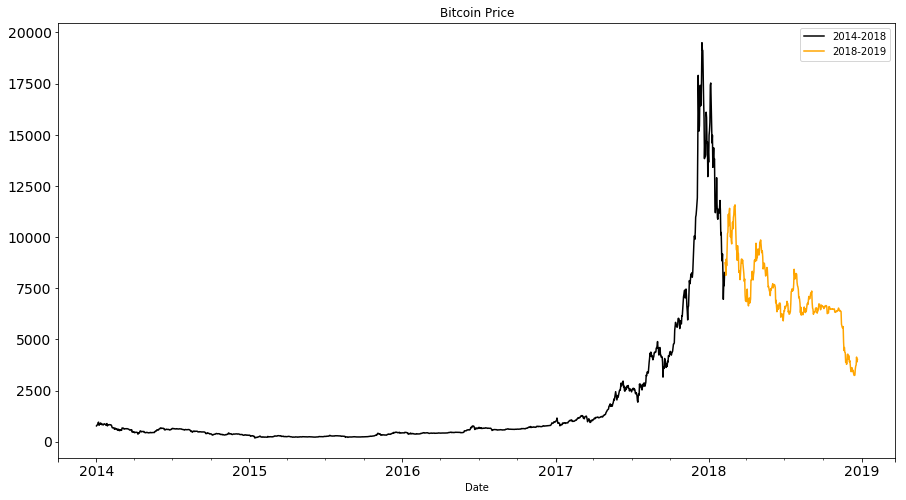

In [3]:
ax = train.plot( y = 'Close', figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = '2014-2018', color = "black")
test.plot(ax=ax, y = 'Close' ,figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = '2018-2019', color = "orange")
plt.show()


## Predict from last known price

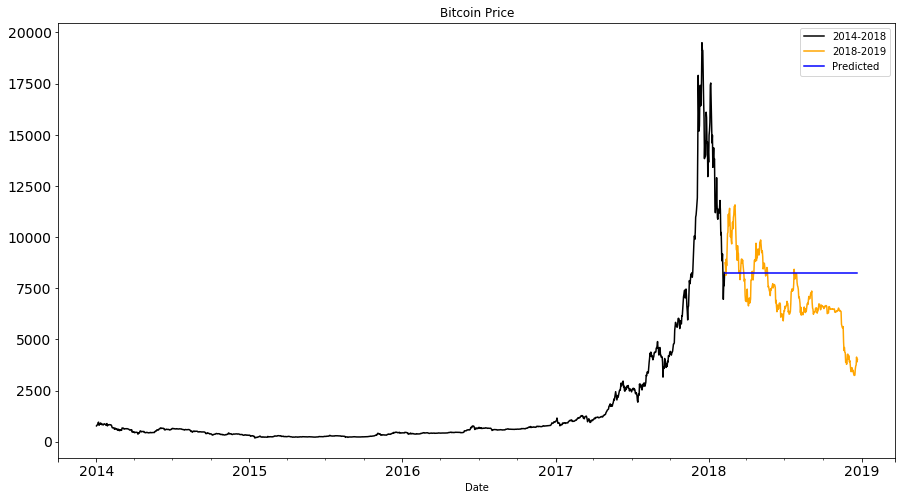

2052.129782270379


In [4]:
last = np.asarray(train.Close)
y_hat = test.copy()
y_hat['last_price'] = last[len(last)-1]
ax = train.plot(y = 'Close', figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = '2014-2018', color = "black")
test.plot(ax=ax,  y = 'Close' ,figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = '2018-2019', color = "orange")
y_hat.plot(ax=ax, y = 'last_price', figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = 'Predicted', color = "blue")
plt.show()
rms = sqrt(mean_squared_error(test.Close, y_hat.last_price))
print(rms)


## 5-Yr Mean

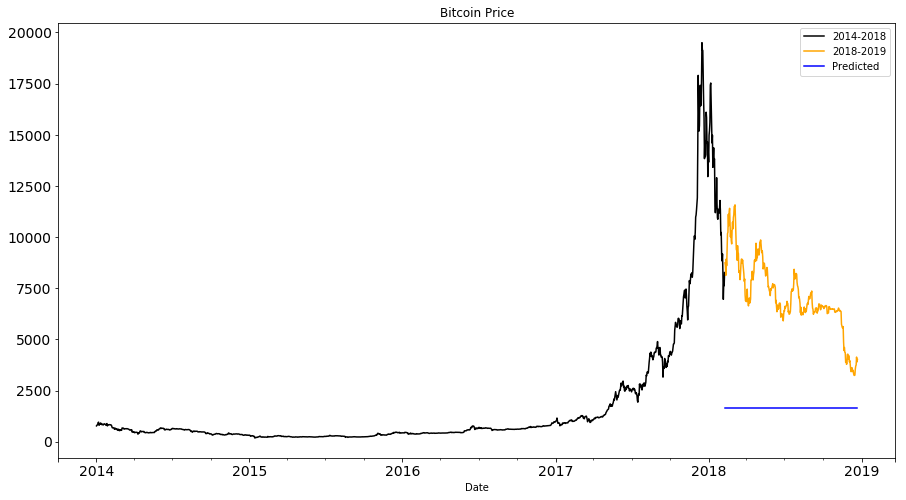

5756.464349644778


In [5]:
y_hat = test.copy()
y_hat['avg_forecast'] = train['Close'].mean()
ax = train.plot(y = 'Close', figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = '2014-2018', color = "black")
test.plot(ax=ax,y = 'Close' ,figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = '2018-2019', color = "orange")
y_hat.plot(ax=ax, y = 'avg_forecast', figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = 'Predicted', color = "blue")
plt.show()
rms = sqrt(mean_squared_error(test.Close, y_hat.avg_forecast))
print(rms)


## 7 Day Rolling Mean

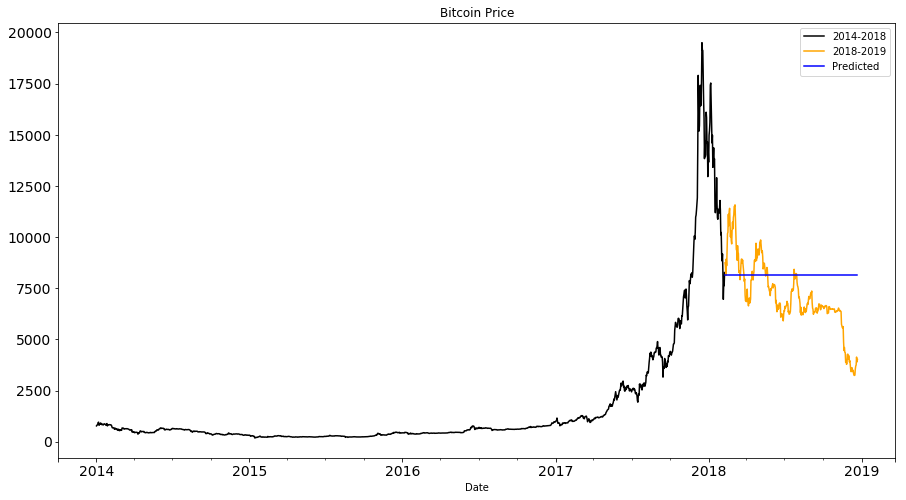

1977.4552245597279


In [6]:
y_hat= test.copy()
y_hat['moving_avg_forecast'] = train['Close'].rolling(7).mean().iloc[-1]
ax = train.plot(y = 'Close', figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = '2014-2018', color = "black")
test.plot(ax=ax, y = 'Close' ,figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = '2018-2019', color = "orange")
y_hat.plot(ax=ax, y = 'moving_avg_forecast', figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = 'Predicted', color = "blue")
plt.show()
rms = sqrt(mean_squared_error(test.Close, y_hat.moving_avg_forecast))
print(rms)

## Simple Exponential Smoothing

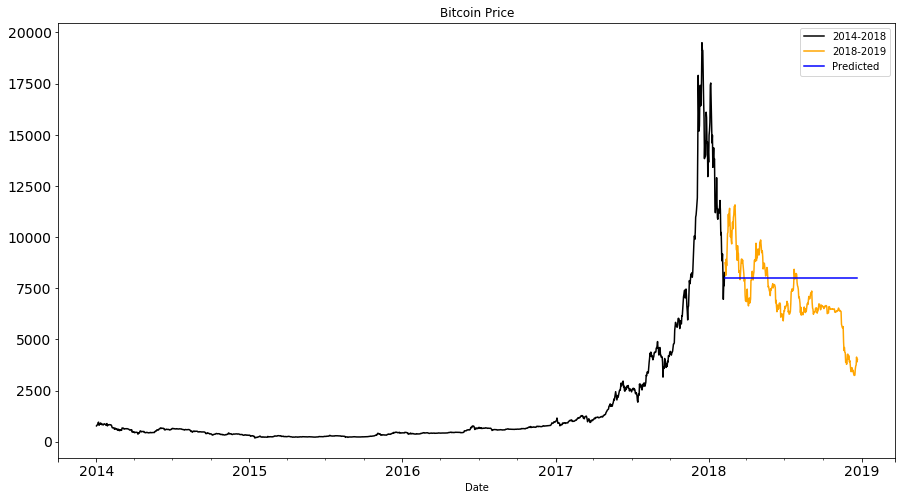

1926.4456720815895


In [7]:
y_hat = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Close'])).fit(smoothing_level=0.6,optimized=False)
y_hat['SES'] = fit2.forecast(len(test))
ax = train.plot(y = 'Close', figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = '2014-2018', color = "black")
test.plot(ax=ax, y = 'Close' ,figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = '2018-2019', color = "orange")
y_hat.plot(ax=ax,y = 'SES', figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = 'Predicted', color = "blue")
plt.show()
rms = sqrt(mean_squared_error(test.Close, y_hat.SES))
print(rms)

## Holt Linear Model

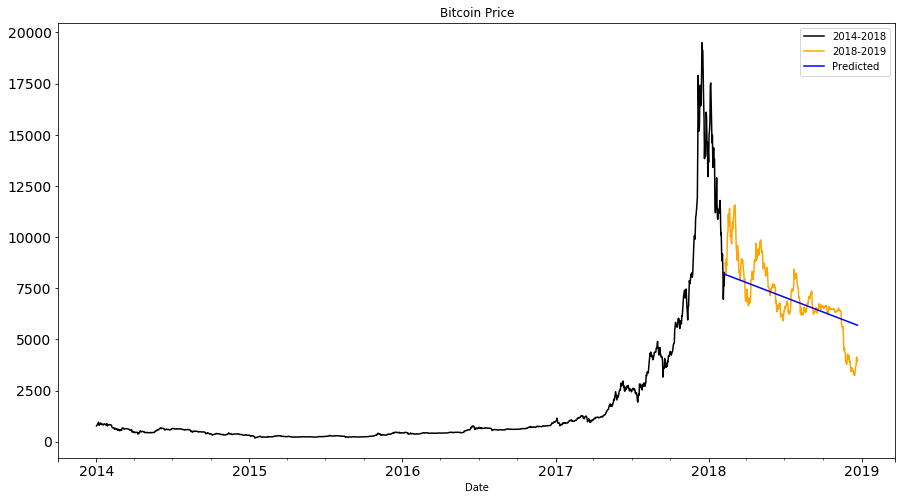

1178.3818283222902


In [8]:
y_hat = test.copy()
fit1 = Holt(np.asarray(train['Close'])).fit(smoothing_level = .91, smoothing_slope = .27)
y_hat['Holt_linear'] = fit1.forecast(len(test))
ax = train.plot(y = 'Close', figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = '2014-2018', color = "black")
test.plot(ax=ax, y = 'Close' ,figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = '2018-2019', color = "orange")
y_hat.plot(ax=ax, y = 'Holt_linear', figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = 'Predicted', color = "blue")
plt.show()
rms = sqrt(mean_squared_error(test.Close, y_hat.Holt_linear))
print(rms)


## Holt-Winters Seasonal Model

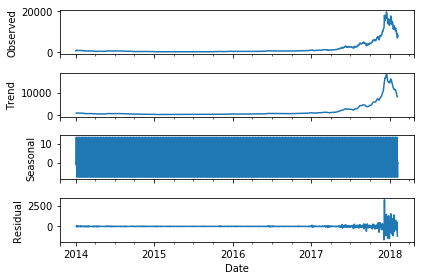

In [9]:
sm.tsa.seasonal_decompose(train.Close).plot()
result = sm.tsa.stattools.adfuller(train.Close)
plt.show()

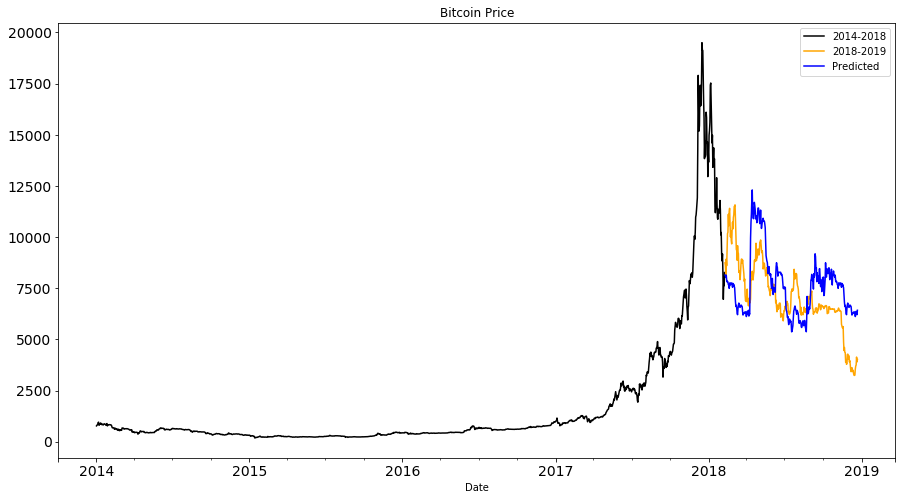

1863.628303517244


In [13]:
y_hat = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Close']) ,seasonal_periods=260 , seasonal='mul', trend = 'add', damped = True).fit()
y_hat['Holt_Winter'] = fit1.forecast(len(test))
ax = train.plot( y = 'Close', figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = '2014-2018', color = "black")
test.plot(ax=ax,  y = 'Close' ,figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = '2018-2019', color = "orange")
y_hat.plot(ax=ax,  y = 'Holt_Winter', figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = 'Predicted', color = "blue")
plt.show()
rms = sqrt(mean_squared_error(test.Close, y_hat.Holt_Winter))
print(rms)

## Seasonal ARIMA Model

In [ ]:

y_hat = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Close,  order = (3,1,3), seasonal_order= (3,1,0,50),  enforce_stationarity=False,
                                enforce_invertibility=False).fit()
y_hat['SARIMA'] = fit1.predict(start='2018-02-09', end='2018-12-22', dynamic= True)
ax = train.plot( y = 'Close', figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = '2014-2018', color = "black")
test.plot(ax=ax,y = 'Close' ,figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = '2018-2019', color = "orange")
y_hat.plot(ax=ax, y = 'SARIMA', figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = 'Predicted', color = "blue")
plt.show()
rms = sqrt(mean_squared_error(test.Close, y_hat.SARIMA))
print(rms)


/home/dpatl/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
